# **Integrantes:**


*   Karen Beatriz Medrano Calderón MC102222
*   Ronald Antonio Portillo Ponce PP100622


# **Aprendizaje supervisado**


# **Algoritmos de clasificación**










## **Implementar algoritmos de arboles binarios**

Descripción del Algoritmo:  Son modelos predictivos formados por reglas binarias (si/no) con las que se consigue repartir las observaciones en función de sus atributos y predecir así el valor de la variable respuesta. Los árboles binarios son árboles  que tienen solo dos nodos hijos, se va bifurcando de dos en dos.
Es útil para comportamientos y toma decisiones de una posible I.A.

<Axes: title={'center': 'Pearson Correlation of Features'}>

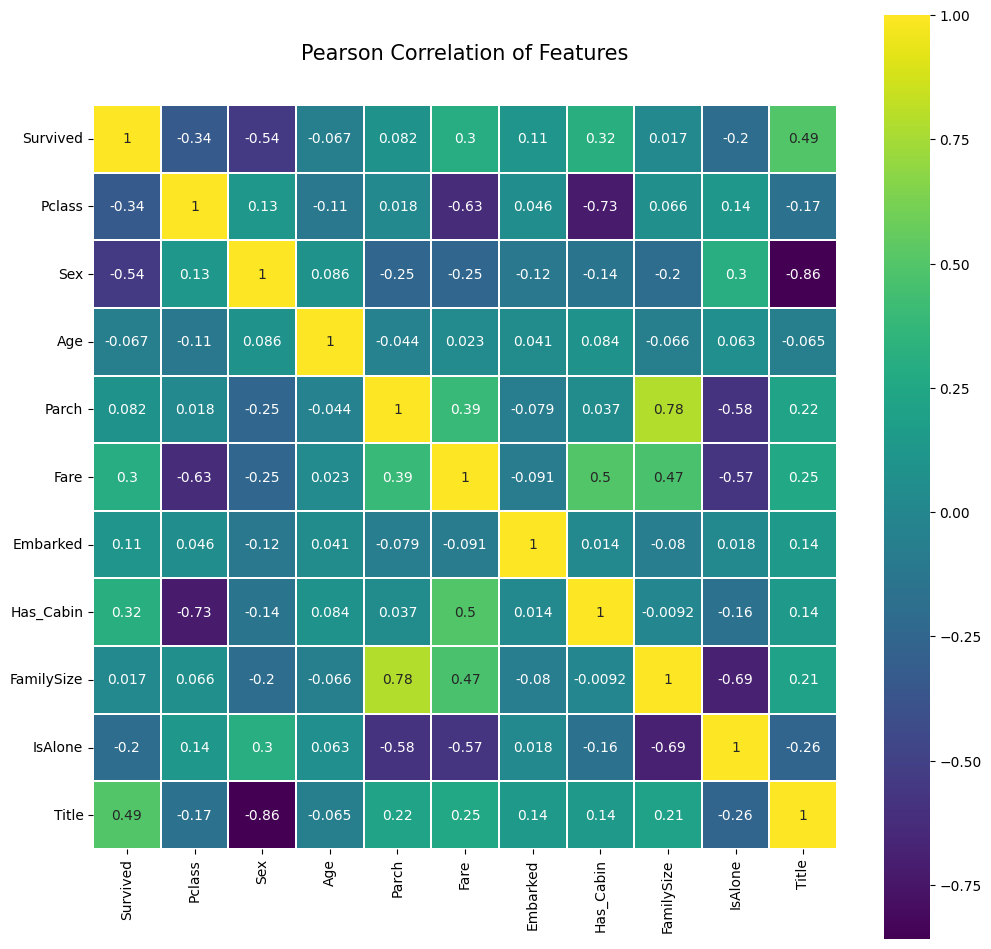

In [1]:
##Agregar aca el Codigo 
#Algoritmo 1 Decision tree
import numpy as np
import pandas as pd
import re
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

# Loading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Store our test passenger IDs for easy access
PassengerId = test['PassengerId']

# Showing overview of the train dataset
train.head(3)

original_train = train.copy()
full_data = [train, test]

# Feature that tells whether a passenger had a cabin on the Titanic
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# Create new feature IsAlone from FamilySize
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
# Remove all NULLS in the Embarked column
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
# Remove all NULLS in the Fare column
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

# Remove all NULLS in the Age column
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    # Next line has been improved to avoid warning
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] ;
# Feature selection: remove variables no longer containing relevant information
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Resultados de la Implementación del Algoritmo

Según el árbol de decisiones utilizando los datos del titanic podemos ver que de acuerdo a diferentes caracteristicas como son titulo, edad, sexo entre otras cada persona tedra diferentes posibilidades de salvarse.

## **Implementar algoritmos de regresión logística**

**Descrión del Algoritmo:** Modelo matemático que ayuda a relacionar dos o más variables categóricas, el objetivo es identificar la relación que tiene una variable en función de la otra.

**Variables predictora:** Son las variables base, se usan para predecir una serie de datos (En un plano matemático se identifica en el eje de la X). 
**Variable a predecir:** Es la variable que se busca predecir (En un plano matemático se identifica en el eje de la Y)

In [2]:
#Algoritmo 2 de regresion Logistica

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Cargar los datos desde el archivo CSV
data = pd.read_csv("archivocanasta.csv")

# Dividir los datos en características (X) y etiquetas (y)
x = data.drop("ANIO", axis=1)
#x=data["metros_totales"]
y = data["ANIO"]
x.head()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Crear el modelo de regresión logística
# Predecir las etiquetas de los datos de prueba
y_pred = model.predict(X_test)

# Calcular la precisión de la clasificación
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)


Precisión: 0.16666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



Resultados de la Implementación del Algoritmo:

Para este caso la precisión que da como resultado indica que al momento de recorrer los datos el algoritmo tuvo problemas para mostrar la informacion con las metricas establecidas, lo cual nos sirve para reconfigurar nuestros algoritmos y obtener mejores resultados





## **Implementar algoritmos de redes neuronales**

**Descrión del Algoritmo:** Se compone de capas de nodos, que contienen una capa de entrada, una o más capas ocultas, y una capa de salida. Cada nodo, o neurona artificial, se conecta a otro y tiene un peso y un umbral asociados. Si la salida de cualquier nodo individual está por encima del valor de umbral especificado, dicho nodo se activa, enviando datos a la siguiente capa de la red. De lo contrario, no se pasan datos a la siguiente capa de la red. 

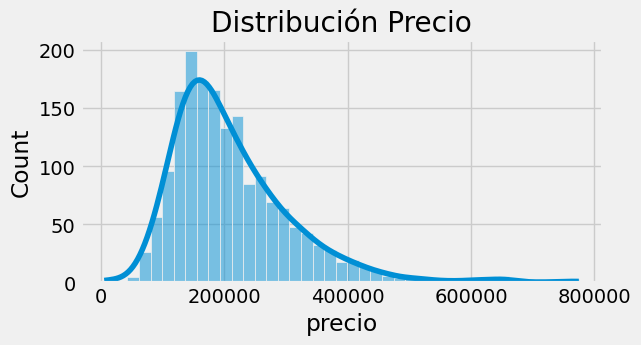

In [3]:
# Algoritmo 3 de redes neuronales

import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Modelado
# ==============================================================================
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

datos = pd.read_csv('boston_housing_esp.csv')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=datos, x='precio', kde=True,ax=ax)
ax.set_title("Distribución Precio")
ax.set_xlabel('precio');

Resultados de la Implementación del Algoritmo

En este algoritmo el precio de los poductos esta por debajo del precio medio, con esta grafica podemos visualizar que tan bajo estamos y con esto intentar generar ideas de como subir dichas variables.

# **Algoritmos de regresión**

## **Implementar algoritmos de regresión lineal** 

**Descrión del Algoritmo:** es un método estadístico que trata de modelar la relación entre una variable continua y una o más variables independientes mediante el ajuste de una ecuación lineal. Se llama regresión lineal simple cuando solo hay una variable independiente y regresión lineal múltiple cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como regresores, predictores o features.

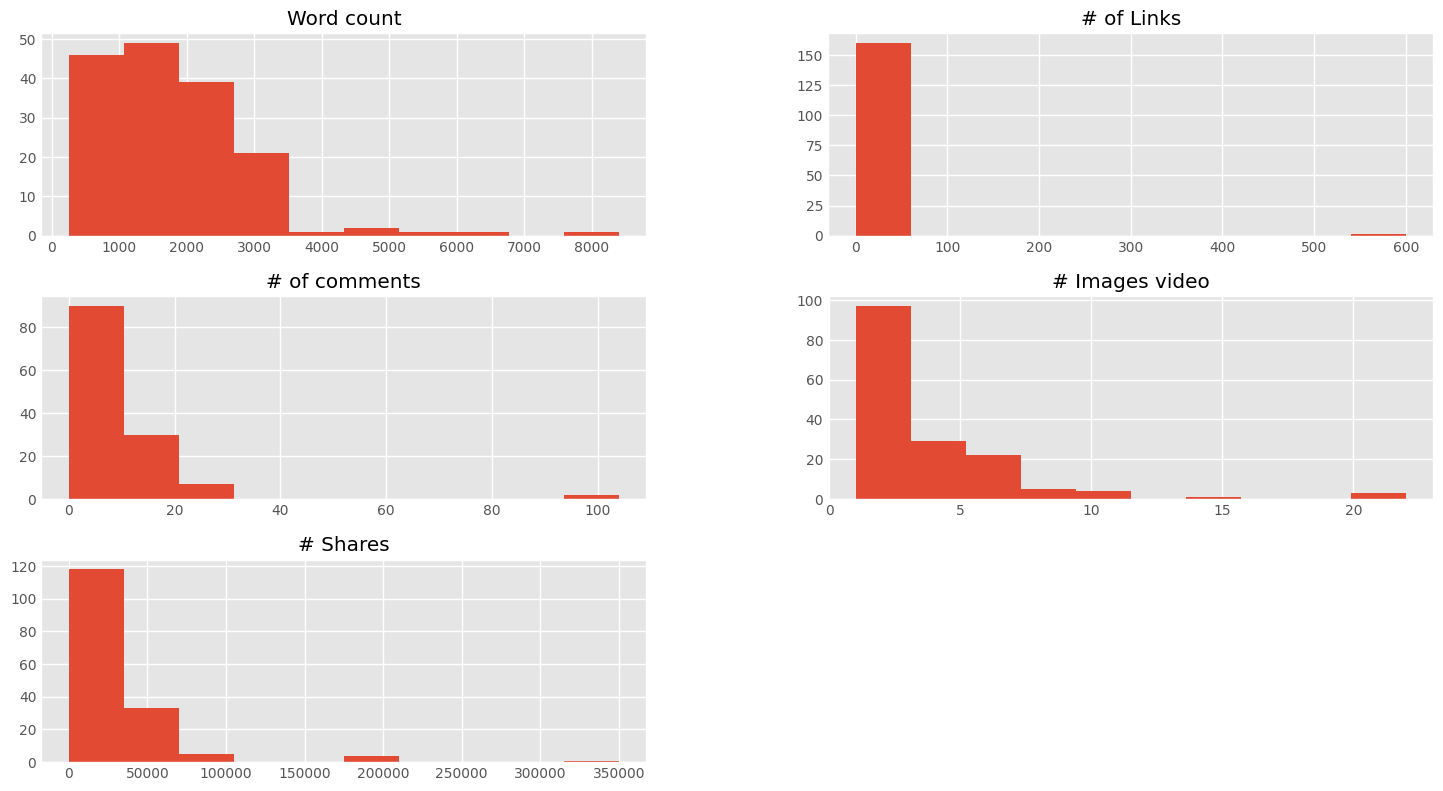

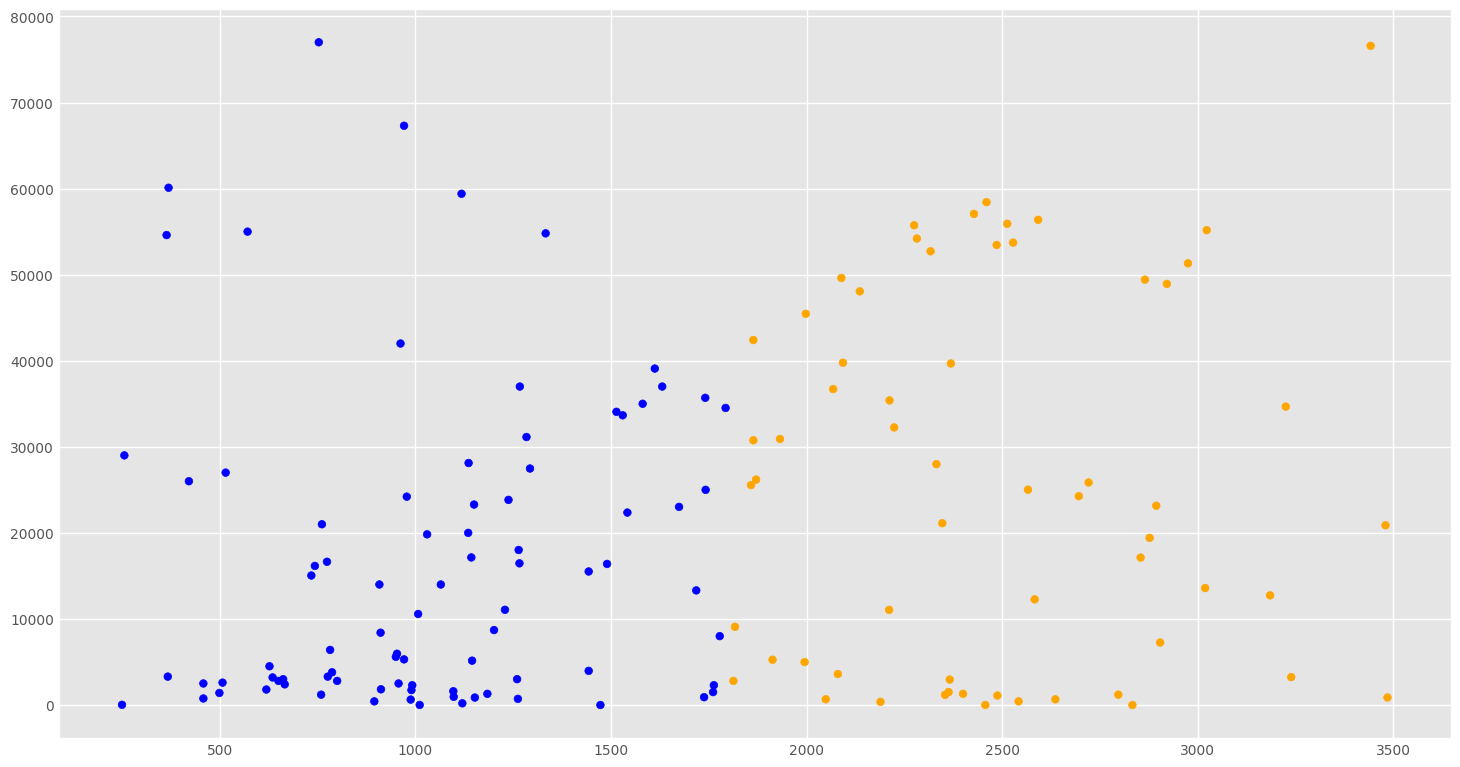

In [4]:
#Algoritmo 4 Regresion Lineal

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("articulos_ml.csv")
data.shape
data.drop(['Title','url', 'Elapsed days'],1).hist()
plt.show()


filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]
 
colores=['orange','blue']
tamanios=[30,60]
 
f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values
 
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

Resultados de la Implementación del Algoritmo:

La dispersion de los datos indica como se distribuyen los datos al respecto de la linea x, lo cual nos podra brindar informacion de como revisar las precisiones y realizar ajustes del mismo

## **Implementar algoritmos de regresión no lineal** 

**Descripción del Algoritmo:** es un método para encontrar un modelo no lineal para la relación entre la variable dependiente y un conjunto de variables independientes. Esto se lleva a cabo usando algoritmos de estimación iterativos.

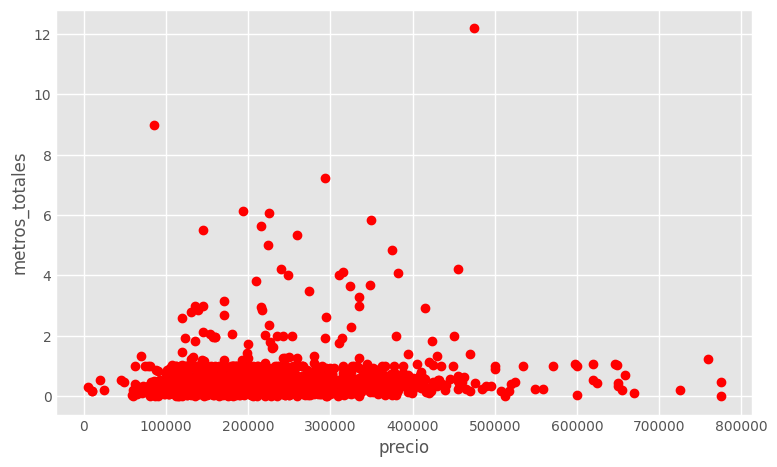

In [5]:
#Algoritmo #5 Algoritmo de regresion No lineal
import numpy as num
import pandas as pds
import matplotlib.pyplot as plot
df = pds.read_csv("boston_housing_esp.csv")
df.head(10)
plot.figure(figsize=(8,5))
x_data, y_data = (df["precio"].values, df["metros_totales"].values)
plot.plot(x_data, y_data, 'ro')
plot.ylabel('metros_totales')
plot.xlabel('precio')
plot.show()

Resultados de la Implementación del Algoritmo:

# **Aprendizaje no supervisado**

## **Implementar algoritmos de agrupamiento - clustering**

**Descripción del Algoritmo:**se basan en la búsqueda de grupos dentro de los datos, con un número de grupos que se representa a través de la letra K. Tras esto, procede a asignar cada punto de datos a uno de los K grupos, dependiendo de las características que se le hayan proporcionado. Existen varios tipos de algoritmos de agrupamiento como: Basados en la densidad,Algoritmos de distribución, Algoritmos basados en centroides, Basados en jerarquías

(array([  2,   5,  10,  11,  12,  13,  15,  16,  17,  18,  19,  20,  22,
        23,  27,  30,  33,  34,  35,  36,  37,  38,  40,  41,  42,  46,
        48,  49,  51,  53,  58,  60,  61,  64,  66,  67,  71,  72,  73,
        77,  80,  81,  82,  85,  87,  88,  90,  92,  93,  96,  97,  98,
       104, 106, 107, 109, 110, 111, 112, 113, 115, 116, 117, 118, 125,
       126, 128, 129, 130, 131, 133, 135, 136, 137, 138, 139, 140, 144,
       145, 146, 147, 156, 158, 160, 167, 171, 173, 176, 178, 179, 185,
       188, 191, 192, 193, 194, 196, 201, 202, 203, 206, 207, 209, 210,
       211, 212, 215, 218, 222, 224, 227, 229, 230, 232, 234, 237, 240,
       241, 242, 245, 249, 250, 252, 255, 256, 259, 260, 261, 262, 264,
       265, 266, 267, 268, 269, 271, 273, 276, 277, 280, 281, 282, 283,
       287, 289, 290, 291, 293, 294, 295, 301, 304, 309, 310, 311, 313,
       314, 315, 316, 317, 318, 319, 320, 321, 323, 326, 327, 328, 330,
       332, 333, 334, 335, 336, 338, 341, 342, 345, 347, 348, 3

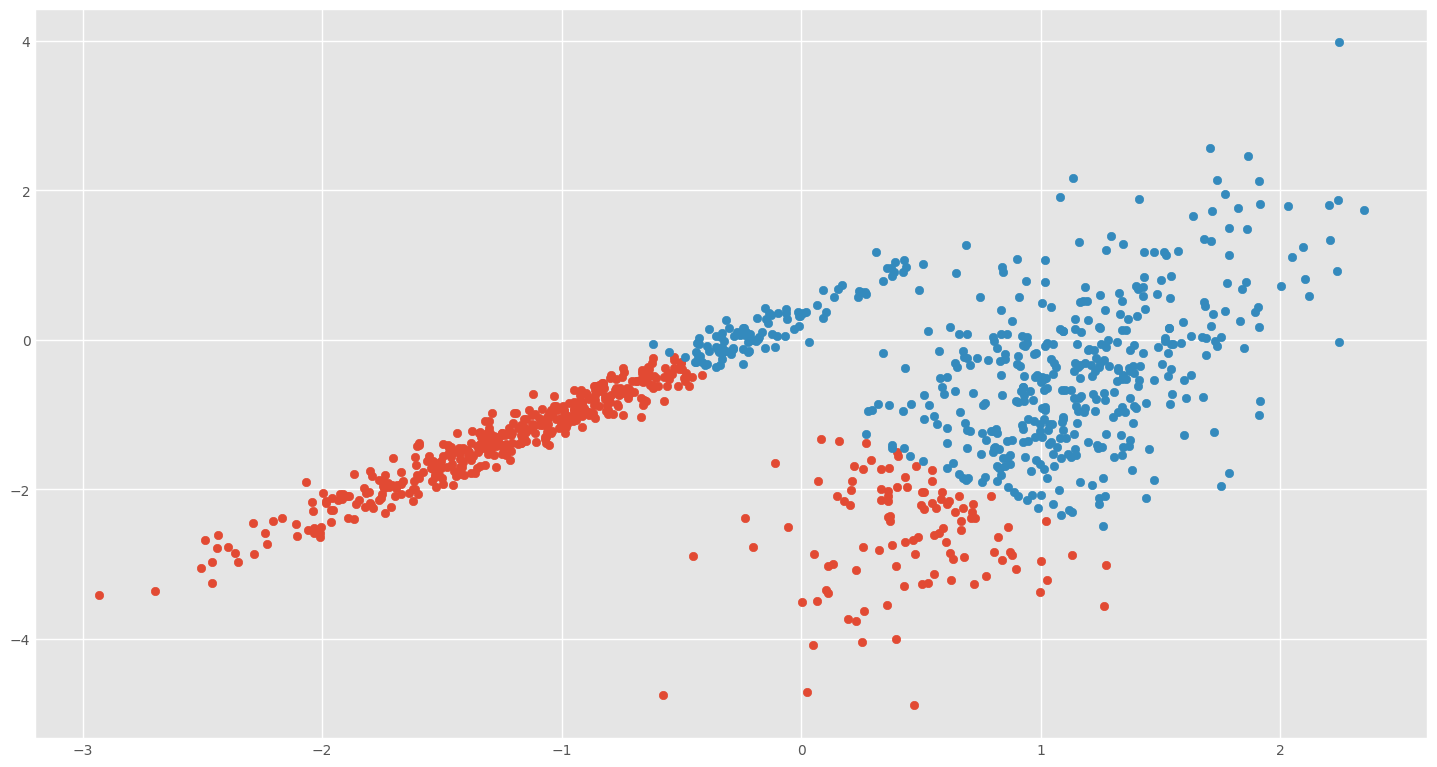

In [6]:
#Implementar algoritmos 6 de agrupamiento - clustering 

from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

# inicializar el conjunto de datos con el que trabajaremos
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# definir el modelo
kmeans_model = KMeans(n_clusters=2)

# Entrenar el modelo
kmeans_model.fit(training_data)

# asignar cada punto de datos a un grupo
kmeans_result = kmeans_model.predict(training_data)

# obtener todos los grupos únicos
kmeans_clusters = unique(kmeans_result)

# graficar los grupos KMeans
for kmeans_cluster in kmeans_clusters:
    # get data points that fall in this cluster
    index = where(kmeans_result == kmeans_cluster)
    # make the plot
    pyplot.scatter(training_data[index, 0], training_data[index, 1])
    print(index)

# mostrar el gráfico K-means
pyplot.show()

Resultados de la Implementación del Algoritmo:
Para este grafico vemos ue tenemos datos que no estan dispersos con lo cual podriamos predecir que nuestros datos estan divididos endos grupos 

## **Implementar algoritmos de procesamiento de imágenes**

Descripción del Algoritmo: 

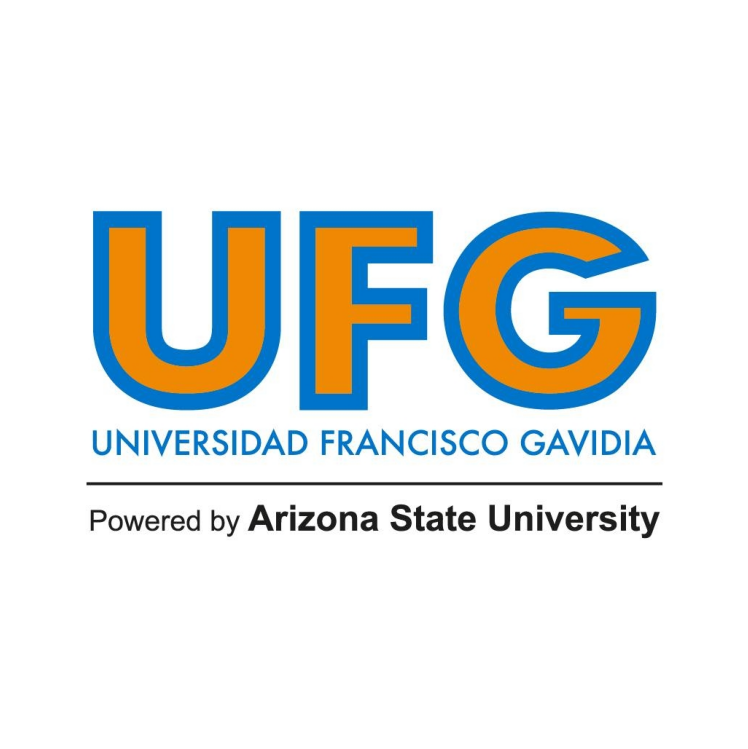

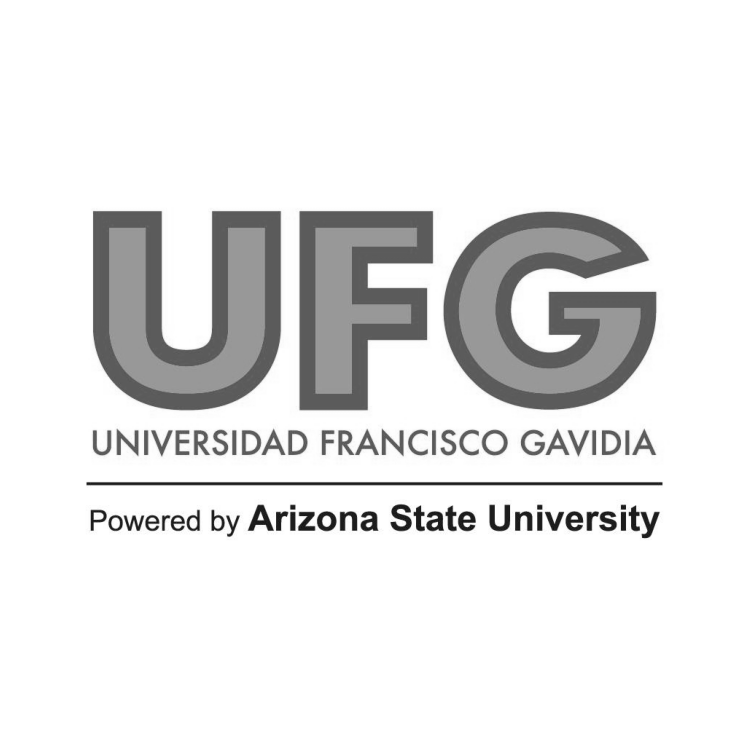

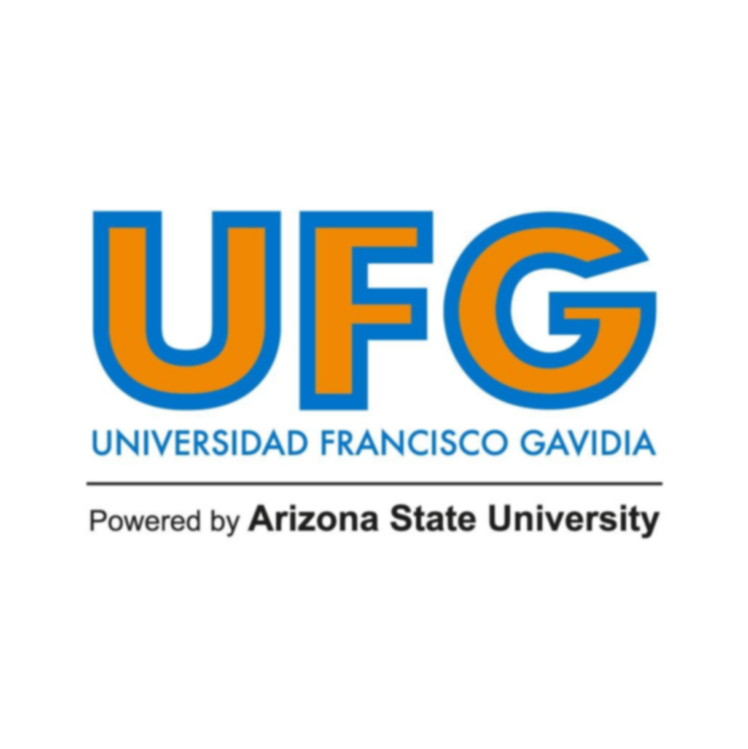

In [7]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen
image = cv2.imread('imagen.jpg')

# Mostrar la imagen original
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Aplicar un filtro de desenfoque a la imagen
blurred_image = cv2.GaussianBlur(image, (7, 7), 0)


# Mostrar la imagen con filtro de desenfoque
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Guardar la imagen procesada
cv2.imwrite('imagen_procesada.jpg', blurred_image)


from IPython.display import Image
Image('imagen_original.jpg')

# Cerrar las ventanas de visualización
cv2.destroyAllWindows()


Resultados de la Implementación del Algoritmo:

Con este tema podemos mejorar o cambiar la estructura de imagenes, lo que nos permitira tener una ventaja en seguridad y vigilancia ya que podemos aclarar o modificar imagenes para una mejor resolución

## **Implementar algoritmos de minería de texto**

**Descripción del Algoritmo:** consiste en transformar un texto no estructurado en datos estructurados para proceder posteriormente al análisis. La primera etapa consiste en recopilar datos, segundo paso pretatamiento de datos, tercer paso formatear los datos para el análisis, para luego despejar la información a partir de los datos obtenidos.

In [8]:
#Implementar algoritmos 8 de minería de texto 

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans

# Cargar los datos desde el archivo CSV
data = pd.read_csv("articulos_ml.csv")

# Extraer el texto de la columna "texto"
text_data = data["Title"]

# Crear una matriz de términos de documento usando CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_data)

# Aplicar transformación TF-IDF a los datos
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)

# Aplicar algoritmo de clustering K-means
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X_tfidf)

# Obtener las etiquetas de cluster asignadas a cada texto
labels = kmeans.labels_

# Imprimir los textos y sus etiquetas de cluster
for i in range(len(text_data)):
    print("Texto:", text_data[i])
    print("Etiqueta de cluster:", labels[i])
    print()

Texto: What is Machine Learning and how do we use it in Signals?
Etiqueta de cluster: 2

Texto: 10 Companies Using Machine Learning in Cool Ways
Etiqueta de cluster: 1

Texto: How Artificial Intelligence Is Revolutionizing the Sector
Etiqueta de cluster: 3

Texto: Dbrain and the Blockchain of Artificial Intelligence
Etiqueta de cluster: 3

Texto: Nasa finds entire solar system filled with eight planets like our own
Etiqueta de cluster: 0

Texto: 5 ways Data Science and Machine Learning impact business
Etiqueta de cluster: 6

Texto: 200 universities just launched 600 free online courses. Here’s the full list.
Etiqueta de cluster: 5

Texto: How Machine Learning can help Cryptocurrency Traders Maximize their Gains
Etiqueta de cluster: 2

Texto: Tech companies should stop pretending AI won’t destroy jobs
Etiqueta de cluster: 7

Texto: Artificial intelligence is going to completely change your life
Etiqueta de cluster: 3

Texto: Facebook robots shut down after they talk to each other in lan

Resultados de la Implementación del Algoritmo:

Esto nos permitira ver si existen patrones o segmentacion del grupo en este caso podemos ver como estan los textos de los datos que mandamos.

## **Implementar algoritmos de agrupamiento - jerárquico**

**Descripción del Algoritmo:** se basan en la idea central de que los objetos están más relacionados con objetos cercanos que con objetos más alejados. Estos algoritmos conectan objetos para formar clústeres en función de su distancia.
**Single - linkage (SLCA):** la distancia entre dos clústeres es la distancia mínima que existe entre dos elementos que pertenecen a diferentes clústeres.
**Complete - linkage (CLCA):** la distancia entre dos clústeres es la distancia máxima que existe entre dos elementos que pertenecen a diferentes clústeres.

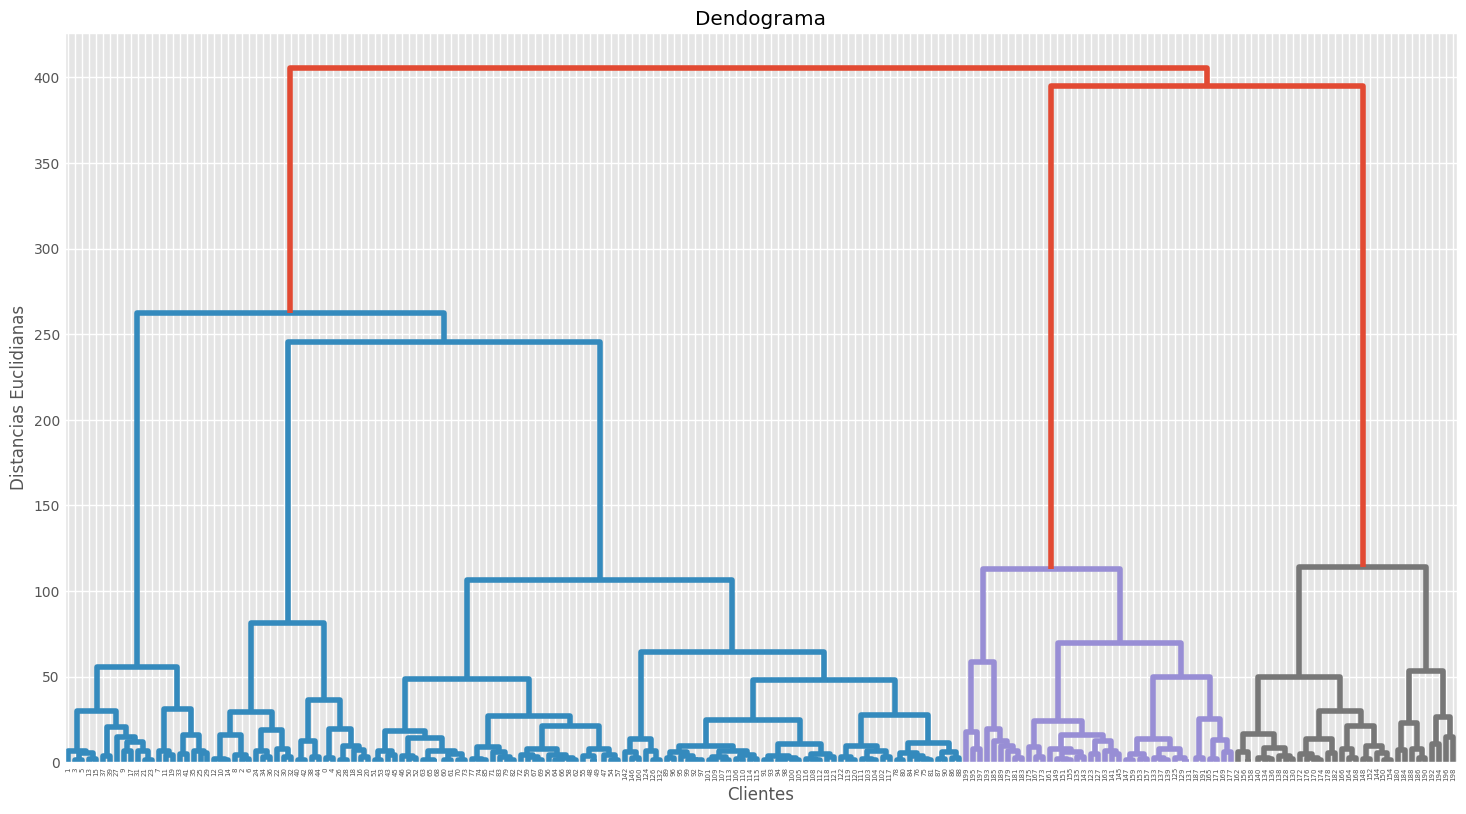

In [ ]:
#IImplementar 9 algoritmos de agrupamiento - jerárquico

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Carga del conjunto de datos
dataset = pd.read_csv('Clientes_Tienda.csv')
X = dataset.iloc[:, [3, 4]].values


import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias Euclidianas')
plt.show()

Resultados de la Implementación del Algoritmo:

Es una forma de resumir nuestros datos para poder obtener resultados mas precisos que nos permitan tomar decisiones por sectores o areas de manera mas rapida y en forma visual que es mas utilizada.

## **Implementar algoritmos de reducción de dimensionalidad - PCA** 


**Descripción del algoritmo:**son técnicas estadísticas que mapean el conjunto de los datos a subespacios derivados del espacio original, de menor dimensión, que permiten hacer una descripción de los datos a un menor costo

In [ ]:
#Implementar 10 algoritmos de reducción de  dimensionalidad - PCA

import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data

print('----------------------')
print('Media de cada variable')
print('----------------------')
print(datos.mean(axis=0))

print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
print(datos.var(axis=0))

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

----------------------
Media de cada variable
----------------------
Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64


,Murder,Assault,UrbanPop,Rape
PC1,0.535899,0.583184,0.278191,0.543432
PC2,0.418181,0.187986,-0.872806,-0.167319
PC3,-0.341233,-0.268148,-0.378016,0.817778
PC4,0.649228,-0.743407,0.133878,0.089024


Resultados de la Implementación del Algoritmo:
Luego de utilizar este algoritmo hemos reducido nuestro espacio de datos lo que nos permitira trabajar de manera mas eficiente.